In [798]:
# import the necessary packages
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import daft
import pandas as pd
import jax
import tqdm

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [1107]:
# LOAD THE DATA
path = '/Users/dhortadarrington/Documents/Master/data/planets-IPL3-clean.csv'
data = pd.read_csv(path)

data

,pl_orbper,pl_radj,pl_bmassj,gaia_dr3_source_id,g_mag,v_rad,teff,logg,v_sini,al_h,...,fe_h,k_h,mg_h,mn_h,na_h,ni_h,n_h,o_h,p_h,si_h
0,516.219970,1.090,14.7400,1696798367260229376,4.556678,-17.452320,3995.0642,2.038023,NaN,-0.460822,...,-0.163693,-0.144580,-0.144726,0.014611,0.145439,-0.056851,-0.316698,-0.342233,0.375666,-0.156204
1,578.380000,1.150,4.3200,4342464209753404416,4.763123,-23.449717,4263.4490,1.904378,NaN,-0.028727,...,-0.102024,0.018180,-0.080417,-0.064389,0.243449,-0.104972,0.042177,-0.126470,0.251351,-0.061532
2,NaN,1.664,8.0000,6243841249531772800,12.037596,-6.795909,4039.7148,4.180454,10.036909,-0.410028,...,-0.149456,-0.105405,-0.241177,-0.217224,0.069347,-0.153912,-0.602204,-0.231531,-0.040327,-0.218481
3,30.330000,1.240,0.8830,1603662211901473408,5.337401,-7.473054,4969.4614,2.205000,NaN,-0.328182,...,-0.714443,-0.361960,-0.359734,-0.869829,-0.092141,-0.685712,-0.702523,-0.311893,-0.149092,-0.426317
4,270.270000,1.120,7.9020,1092230803512999424,4.222566,14.513218,4448.0303,2.260784,NaN,-0.106747,...,-0.219533,-0.101410,-0.154212,-0.209049,0.191099,-0.194222,-0.095905,-0.238598,-0.062082,-0.203659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,3.191540,1.410,7.2900,470650560779277952,9.742960,-10.021352,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1213,2.864142,1.373,0.7090,2303332931542914048,10.459597,-12.969485,5928.4410,3.990583,6.734727,0.540952,...,0.412564,0.564465,0.402866,0.485936,0.765247,0.507098,0.729206,0.439608,0.216198,0.478151
1214,2671.000000,1.250,0.6600,5164707970261890560,3.465752,16.466043,5167.3640,4.562585,4.699590,-0.015709,...,-0.038044,-2.372785,-0.029103,-0.073354,-0.501423,-0.111952,-0.010847,0.017223,0.023523,-0.044213
1215,357.800000,1.180,2.4000,643819484617141504,3.530155,13.814999,4487.9210,2.542600,NaN,0.395088,...,0.308947,0.401330,0.314328,0.441031,0.865379,0.456208,0.620555,0.228778,0.462838,0.257994


(-2.0, 1.0)

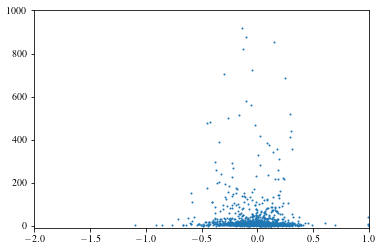

In [1132]:
plt.scatter(data['fe_h'], data['pl_orbper'],s=1)
plt.ylim(-10,1000)
plt.xlim(-2,1)

In [1108]:
# make some diagnostic plots to remove bad stars
mask = (data['teff']>3000)&(data['teff']<8000)&(data['logg']>0)&(data['logg']<6)&(np.abs(data['al_h'])<2)\
    &(np.abs(data['ca_h'])<2)&(np.abs(data['mg_h'])<2)&(np.abs(data['fe_h'])<2)\
    &(np.abs(data['si_h'])<2)&(np.abs(data['p_h'])<2)&(np.abs(data['v_sini'])<100)\
    &(np.abs(data['pl_orbper'])<5e3) &(np.abs(data['pl_radj'])<500)&(np.abs(data['pl_bmassj'])<500)
print(len(data[mask]))

1133


In [1109]:
data[mask]

,pl_orbper,pl_radj,pl_bmassj,gaia_dr3_source_id,g_mag,v_rad,teff,logg,v_sini,al_h,...,fe_h,k_h,mg_h,mn_h,na_h,ni_h,n_h,o_h,p_h,si_h
6,919.860000,1.200,1.88100,1004358968092652544,5.609718,40.219006,4913.3755,3.130615,4.773754,-0.007907,...,-0.133563,-0.064460,-0.056525,-0.114909,0.393568,-0.134122,-0.010675,-0.188236,-0.082962,-0.115168
10,723.200000,1.070,25.05000,2651390587219807744,8.788991,23.937506,5137.3433,4.400443,1.502069,0.164742,...,-0.049365,0.126038,0.142024,-0.073464,0.176609,-0.026581,-0.051304,0.029046,-0.063177,0.036243
11,1634.000000,1.250,0.65000,4154598526336121600,9.488493,-87.194020,4201.2750,4.461917,3.484817,-0.314978,...,-0.230346,-0.160865,-0.318517,-0.248734,-0.266173,-0.287712,-0.545294,-0.281113,-0.099447,-0.341391
12,8.989100,1.110,11.60000,145203159127518336,12.181539,17.134990,3793.2349,3.529083,14.962357,-1.168492,...,-0.520403,-0.364890,-0.796314,-0.439829,0.495135,-0.799012,-1.109104,-0.801273,-0.472592,-0.837917
13,1.742994,1.466,3.47000,4287820848378092672,12.236511,23.630636,5487.6090,4.448278,11.746270,-0.050855,...,-0.029113,-0.086595,-0.112355,-0.116274,-0.288813,-0.081804,-0.057389,-0.018631,0.670643,-0.083133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,6.001270,0.182,0.01973,3620325206217720320,9.901058,-46.648320,4602.5650,4.595613,1.501136,-0.161798,...,-0.335356,-0.094625,-0.055567,-0.510604,-0.117123,-0.298182,-0.479674,-0.175887,-0.059277,-0.228708
1211,2.615862,0.993,0.56600,934346809278715776,10.970856,47.288647,5252.1470,4.135899,1.910645,0.527012,...,0.392574,0.332005,0.431246,0.435666,0.753547,0.418278,0.549206,0.386136,0.383323,0.434765
1213,2.864142,1.373,0.70900,2303332931542914048,10.459597,-12.969485,5928.4410,3.990583,6.734727,0.540952,...,0.412564,0.564465,0.402866,0.485936,0.765247,0.507098,0.729206,0.439608,0.216198,0.478151
1214,2671.000000,1.250,0.66000,5164707970261890560,3.465752,16.466043,5167.3640,4.562585,4.699590,-0.015709,...,-0.038044,-2.372785,-0.029103,-0.073354,-0.501423,-0.111952,-0.010847,0.017223,0.023523,-0.044213


In [1110]:
dat = data[mask].T[0:]

In [1111]:
dat

,6,10,11,12,13,14,15,17,18,19,...,1204,1206,1207,1208,1209,1210,1211,1213,1214,1216
pl_orbper,9.198600e+02,7.232000e+02,1.634000e+03,8.989100e+00,1.742994e+00,8.535916e-01,9.527266e+01,3.498200e+00,6.798700e+00,7.209100e-01,...,4.411950e+00,2.903670e+00,2.484193e+00,2.655678e+00,1.556400e+01,6.001270e+00,2.615862e+00,2.864142e+00,2.671000e+03,4.617033e+00
pl_radj,1.200000e+00,1.070000e+00,1.250000e+00,1.110000e+00,1.466000e+00,1.500000e-01,1.066000e+00,3.150000e-01,9.300000e-02,1.340000e-01,...,1.320000e+00,1.180000e+00,1.270000e+00,1.240000e+00,9.600000e-02,1.820000e-01,9.930000e-01,1.373000e+00,1.250000e+00,1.250000e+00
pl_bmassj,1.881000e+00,2.505000e+01,6.500000e-01,1.160000e+01,3.470000e+00,1.283000e-02,8.400000e-01,3.839000e-02,3.600000e-03,8.990000e-03,...,5.200000e-01,1.390000e+00,1.070000e+00,1.265000e+00,3.960000e-03,1.973000e-02,5.660000e-01,7.090000e-01,6.600000e-01,6.876000e-01
gaia_dr3_source_id,1.004359e+18,2.651391e+18,4.154599e+18,1.452032e+17,4.287821e+18,3.107267e+18,4.285572e+18,2.136028e+18,3.786542e+18,3.698080e+18,...,4.756649e+18,2.507902e+18,2.605161e+18,3.909745e+18,2.188319e+18,3.620325e+18,9.343468e+17,2.303333e+18,5.164708e+18,3.480205e+17
g_mag,5.609718e+00,8.788991e+00,9.488493e+00,1.218154e+01,1.223651e+01,1.151991e+01,1.348920e+01,5.597351e+00,1.652605e+01,1.413465e+01,...,1.007733e+01,1.056854e+01,1.133117e+01,1.064011e+01,1.235227e+01,9.901058e+00,1.097086e+01,1.045960e+01,3.465752e+00,3.966133e+00
v_rad,4.021901e+01,2.393751e+01,-8.719402e+01,1.713499e+01,2.363064e+01,3.139801e+01,1.997576e+01,1.004848e+00,-1.787015e+01,-1.413860e+01,...,1.532716e+01,8.194062e+00,2.804608e+00,1.346627e+01,-6.008744e+01,-4.664832e+01,4.728865e+01,-1.296949e+01,1.646604e+01,-2.821164e+01
teff,4.913376e+03,5.137343e+03,4.201275e+03,3.793235e+03,5.487609e+03,5.301727e+03,5.658383e+03,6.164720e+03,3.373096e+03,5.476329e+03,...,6.091803e+03,5.968690e+03,5.906047e+03,5.317673e+03,3.033415e+03,4.602565e+03,5.252147e+03,5.928441e+03,5.167364e+03,6.090666e+03
logg,3.130615e+00,4.400443e+00,4.461917e+00,3.529083e+00,4.448278e+00,4.399645e+00,4.392796e+00,3.992641e+00,4.930496e+00,4.177025e+00,...,4.074404e+00,3.862325e+00,4.014019e+00,4.460464e+00,4.897758e+00,4.595613e+00,4.135899e+00,3.990583e+00,4.562585e+00,3.902081e+00
v_sini,4.773754e+00,1.502069e+00,3.484817e+00,1.496236e+01,1.174627e+01,1.510150e+00,2.373996e+00,9.840111e+00,5.010603e+00,1.678804e+00,...,8.924420e+00,9.048154e+00,6.508936e+00,3.073973e+00,3.655864e+00,1.501136e+00,1.910645e+00,6.734727e+00,4.699590e+00,1.013911e+01
al_h,-7.906571e-03,1.647423e-01,-3.149777e-01,-1.168492e+00,-5.085502e-02,7.844228e-02,-1.683272e-02,1.377423e-01,-5.603577e-01,3.797823e-01,...,1.950423e-01,4.448823e-01,1.788623e-01,-2.221672e-02,-4.524177e-01,-1.617977e-01,5.270123e-01,5.409523e-01,-1.570872e-02,2.501223e-01


In [1112]:
# drop_idx = list(range(1,data.shape[1],2)) #Indexes to drop
# drop_cols = [j for i,j in enumerate(data.columns) if i in drop_idx] 

In [1113]:
# dat = data.drop(drop_cols, axis=1)
listd = ['gaia_dr3_source_id']
dat = dat.drop(listd,axis=0)
# dat = dat[mask]

In [1114]:
dat

,6,10,11,12,13,14,15,17,18,19,...,1204,1206,1207,1208,1209,1210,1211,1213,1214,1216
pl_orbper,919.860000,723.200000,1634.000000,8.989100,1.742994,0.853592,95.272656,3.498200,6.798700,0.720910,...,4.411950,2.903670,2.484193,2.655678,15.564000,6.001270,2.615862,2.864142,2671.000000,4.617033
pl_radj,1.200000,1.070000,1.250000,1.110000,1.466000,0.150000,1.066000,0.315000,0.093000,0.134000,...,1.320000,1.180000,1.270000,1.240000,0.096000,0.182000,0.993000,1.373000,1.250000,1.250000
pl_bmassj,1.881000,25.050000,0.650000,11.600000,3.470000,0.012830,0.840000,0.038390,0.003600,0.008990,...,0.520000,1.390000,1.070000,1.265000,0.003960,0.019730,0.566000,0.709000,0.660000,0.687600
g_mag,5.609718,8.788991,9.488493,12.181539,12.236511,11.519906,13.489204,5.597351,16.526050,14.134650,...,10.077329,10.568542,11.331169,10.640107,12.352267,9.901058,10.970856,10.459597,3.465752,3.966133
v_rad,40.219006,23.937506,-87.194020,17.134990,23.630636,31.398010,19.975761,1.004848,-17.870146,-14.138597,...,15.327161,8.194062,2.804608,13.466269,-60.087440,-46.648320,47.288647,-12.969485,16.466043,-28.211637
teff,4913.375500,5137.343300,4201.275000,3793.234900,5487.609000,5301.726600,5658.383300,6164.720000,3373.096200,5476.329000,...,6091.803000,5968.690000,5906.047400,5317.673000,3033.415300,4602.565000,5252.147000,5928.441000,5167.364000,6090.666000
logg,3.130615,4.400443,4.461917,3.529083,4.448278,4.399645,4.392796,3.992641,4.930496,4.177025,...,4.074404,3.862325,4.014019,4.460464,4.897758,4.595613,4.135899,3.990583,4.562585,3.902081
v_sini,4.773754,1.502069,3.484817,14.962357,11.746270,1.510150,2.373996,9.840111,5.010603,1.678804,...,8.924420,9.048154,6.508936,3.073973,3.655864,1.501136,1.910645,6.734727,4.699590,10.139113
al_h,-0.007907,0.164742,-0.314978,-1.168492,-0.050855,0.078442,-0.016833,0.137742,-0.560358,0.379782,...,0.195042,0.444882,0.178862,-0.022217,-0.452418,-0.161798,0.527012,0.540952,-0.015709,0.250122
ca_h,-0.059744,-0.036464,-0.257624,-0.279627,-0.022714,0.066768,-0.003956,-0.148409,-0.082159,0.253994,...,0.132387,0.289059,0.125455,0.074313,0.015241,-0.202859,0.390038,0.350931,-0.055726,-0.044139


In [1121]:
dat.plot(x = 'pl_radj', y = 'teff',s=1)

KeyError: 'pl_radj'

In [817]:
listd = ['pl_orbper', 'pl_radj', 'pl_bmassj', 'g_mag', 'v_rad', 'teff', 'logg', 'v_sini']
labels_train = dat.drop(listd,axis=0)


In [818]:
labels_train

,6,10,11,12,13,14,15,17,18,19,...,1204,1206,1207,1208,1209,1210,1211,1213,1214,1216
al_h,-0.007907,0.164742,-0.314978,-1.168492,-0.050855,0.078442,-0.016833,0.137742,-0.560358,0.379782,...,0.195042,0.444882,0.178862,-0.022217,-0.452418,-0.161798,0.527012,0.540952,-0.015709,0.250122
ca_h,-0.059744,-0.036464,-0.257624,-0.279627,-0.022714,0.066768,-0.003956,-0.148409,-0.082159,0.253994,...,0.132387,0.289059,0.125455,0.074313,0.015241,-0.202859,0.390038,0.350931,-0.055726,-0.044139
ce_h,-0.079540,0.168751,-0.251469,-0.401940,0.322771,0.173601,0.014919,0.172861,-0.327309,0.129481,...,0.124331,-0.172819,0.330241,0.072164,-0.086040,-0.242799,0.385881,0.660001,0.072954,-0.695399
c_h,-0.130684,0.115702,-0.190317,-0.531342,-0.233210,0.085264,-0.034904,-0.099392,-0.028438,0.349143,...,0.083868,0.200898,0.240929,-0.104240,-0.308663,-0.291327,0.470369,0.304148,-0.096270,-0.079342
fe_h,-0.133563,-0.049365,-0.230346,-0.520403,-0.029113,0.074208,-0.022479,-0.049021,-0.131496,0.259364,...,0.162104,0.284364,0.139784,-0.026687,-0.409876,-0.335356,0.392574,0.412564,-0.038044,0.127894
k_h,-0.064460,0.126038,-0.160865,-0.364890,-0.086595,-0.172395,-0.104285,-0.092995,0.075544,0.133171,...,0.155612,0.167524,-0.220675,-0.105465,-0.032865,-0.094625,0.332005,0.564465,-2.372785,0.478745
mg_h,-0.056525,0.142024,-0.318517,-0.796314,-0.112355,0.107119,0.000376,-0.032209,-0.116720,0.367751,...,0.063623,0.230453,0.096223,-0.045371,-0.420045,-0.055567,0.431246,0.402866,-0.029103,0.092379
mn_h,-0.114909,-0.073464,-0.248734,-0.439829,-0.116274,0.109793,-0.013394,-0.074974,0.007816,0.316286,...,0.100238,0.375186,0.185379,-0.047574,-0.265714,-0.510604,0.435666,0.485936,-0.073354,0.297986
na_h,0.393568,0.176609,-0.266173,0.495135,-0.288813,-0.012873,0.194687,0.041527,0.338644,0.706967,...,-0.150833,0.539267,0.339924,0.145407,0.031367,-0.117123,0.753547,0.765247,-0.501423,-0.667533
ni_h,-0.134122,-0.026581,-0.287712,-0.799012,-0.081804,0.078633,-0.037732,-0.092054,-0.147862,0.318628,...,0.147448,0.363278,0.199158,-0.057415,-0.408722,-0.298182,0.418278,0.507098,-0.111952,0.008717


In [819]:
drop_idx = list(range(4,data.shape[1],1)) #Indexes to drop
drop_cols = [j for i,j in enumerate(data.columns) if i in drop_idx] 
drop_cols
labels_test = dat.drop(drop_cols,axis=0)

In [820]:
labels_test

,6,10,11,12,13,14,15,17,18,19,...,1204,1206,1207,1208,1209,1210,1211,1213,1214,1216
pl_orbper,919.860,723.20,1634.00,8.9891,1.742994,0.853592,95.272656,3.49820,6.7987,0.72091,...,4.41195,2.90367,2.484193,2.655678,15.56400,6.00127,2.615862,2.864142,2671.00,4.617033
pl_radj,1.200,1.07,1.25,1.1100,1.466000,0.150000,1.066000,0.31500,0.0930,0.13400,...,1.32000,1.18000,1.270000,1.240000,0.09600,0.18200,0.993000,1.373000,1.25,1.250000
pl_bmassj,1.881,25.05,0.65,11.6000,3.470000,0.012830,0.840000,0.03839,0.0036,0.00899,...,0.52000,1.39000,1.070000,1.265000,0.00396,0.01973,0.566000,0.709000,0.66,0.687600


In [821]:
# turn it into a numpy array
labels_tr = jnp.array(labels_train)
labels_te = jnp.array(labels_test)

In [822]:
# split the data into train and test sets
m, n = labels_tr.shape # n = number of stars; m = number of labels
print('There are '+str(n)+' number of points, and '+str(m)+' number of features')

# pick the first 800 stars for our training set
X_train = labels_tr[:,:800]
X_test = labels_te[:,:800]

print('Train data shape: '+str(X_train.shape)+'; Test data shape '+str(X_test.shape))

There are 1133 number of points, and 14 number of features
Train data shape: (14, 800); Test data shape (3, 800)


In [1142]:
# need to initialise all our parameters for the weights and biases

def initialise_params(X_train, X_test, K1 = 10, K2 = 3):
    
    input_size = X_train.shape[0] # number of input dimensions (labels)
    output_size = X_test.shape[0] # number of output dimensions (labels)
    
    W1 = np.random.rand(K, input_size) 
    b1 = jnp.zeros((K1, 1)) 
    W2 = np.random.rand(K2, K1) 
    b2 = jnp.zeros((K2, 1))  
    
    # np.sqrt(1/size of previous layer) : This is called Xavier initialisation, and it ensures the weights are not initialised to 0,
    # which can cause problems
    
    return W1, b1, W2, b2
    
    
def ReLU(Z):
    return jnp.maximum(0, Z)

# def deriv_ReLU(Z):
#     return jnp.maximum(0, 1)

def softmax(Z):
    return jnp.exp(Z)/jnp.sum(jnp.exp(Z))
    
def sigmoid(Z):
    return 1./(1.+jnp.exp(-Z))

def tanh(Z):
    return jnp.tanh(Z)

def forward_prop(X, W1, b1, W2, b2):
    
    # first layer
    Z1 = W1@X + b1
    # first layer activation
    A1 = ReLU(Z1)
    # second layer
    Z2 = W2@A1 + b2
    # Second layer activation
    A2 = sigmoid(Z2)
    # prediction
    P = A2
    
    return P

def cost_mse(Y, X, W1, b1, W2, b2):
    
    # calculate the predicted value
    P = forward_prop(X, W1, b1, W2, b2)
    # estimate the loss
    loss = jnp.sum((P-Y)**2/Y.shape[1])
    
    return loss

def backward_prop(X_test, X_train, W1, b1, W2, b2):

    # calculate the gradients
    grad_cost_mse_W1 = jax.grad(cost_mse, 2)
    grad_cost_mse_b1 = jax.grad(cost_mse, 3)
    grad_cost_mse_W2 = jax.grad(cost_mse, 4)
    grad_cost_mse_b2 = jax.grad(cost_mse, 5)
    
    grad_W1 = grad_cost_mse_W1(X_test, X_train, W1, b1, W2, b2)
    grad_b1 = grad_cost_mse_b1(X_test, X_train, W1, b1, W2, b2)
    grad_W2 = grad_cost_mse_W2(X_test, X_train, W1, b1, W2, b2)
    grad_b2 = grad_cost_mse_b2(X_test, X_train, W1, b1, W2, b2)
    
    return grad_W1, grad_b1, grad_W2, grad_b2
    

def update_params(W1, b1, W2, b2, grad_W1, grad_b1, grad_W2, grad_b2, lr = 0.05):

    W1_new = W1 - lr * grad_W1
    b1_new = b1 - lr * grad_b1
    W2_new = W2 - lr * grad_W2
    b2_new = b2 - lr * grad_b2
    
    return W1_new, b1_new, W2_new, b2_new


def grad_descent(X_train, X_test, iterations, W1, b1, W2, b2, lr1, lr2):
        
    loss = []
    W1_save = np.zeros((iterations, W1.shape[0], W1.shape[1]))
    b1_save = np.zeros((iterations, b1.shape[0], b1.shape[1]))
    W2_save = np.zeros((iterations, W2.shape[0], W2.shape[1]))
    b2_save = np.zeros((iterations, b2.shape[0], b2.shape[1]))

    # loop over the iterations and perform the fitting
    for indx, i in tqdm.tqdm_notebook(enumerate(range(iterations))):
        
        if i<=10000:
            # estimate the predicted value given the initialised parameters
            prediction = forward_prop(X_train, W1, b1, W2, b2)

            # run backward propagation
            grad_W1, grad_b1, grad_W2, grad_b2 = backward_prop(X_test, X_train, W1, b1, W2, b2)

            # update the weights and biases in the model
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, grad_W1, grad_b1, grad_W2, grad_b2, lr=lr1)
            
            # store the values of the parameters in the chain
            W1_save[indx], b1_save[indx], W2_save[indx], b2_save[indx] = W1, b1, W2, b2
            
            # print the iteration and calculate the new loss value given the updated weights and biases
            loss.append(cost_mse(X_test, X_train, W1, b1, W2, b2))
            
        elif i>10000:
            # estimate the predicted value given the initialised parameters
            prediction = forward_prop(X_train, W1, b1, W2, b2)

            # run backward propagation
            grad_W1, grad_b1, grad_W2, grad_b2 = backward_prop(X_test, X_train, W1, b1, W2, b2)

            # update the weights and biases in the model
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, grad_W1, grad_b1, grad_W2, grad_b2, lr=lr2)

            # store the values of the parameters in the chain
            W1_save[indx], b1_save[indx], W2_save[indx], b2_save[indx] = W1, b1, W2, b2
            
            # print the iteration and calculate the new loss value given the updated weights and biases
            loss.append(cost_mse(X_test, X_train, W1, b1, W2, b2))
            
    return W1, b1, W2, b2, loss, W1_save, b1_save, W2_save, b2_save
        

In [1143]:
# initialise the parameters
W1, b1, W2, b2 = initialise_params(X_train, X_test)

# estimate the loss from the initialised parameters
loss = cost_mse(X_test, X_train, W1, b1, W2, b2)
print('Loss from initialised parameters: '+str(loss))


Loss from initialised parameters: 78396.76


In [1146]:
iterations = 1000

W1_2, b1_2, W2_2, b2_2, loss_2, W1_save_2, b1_save_2, W2_save_2, b2_save_2 = \
                grad_descent(X_train, X_test, iterations, W1, b1, W2, b2, 0.001, 0.0001)

/var/folders/rq/q7l_wtbx4sx5ky0yrvbk7fgh0000gq/T/ipykernel_77160/3046814253.py:93: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for indx, i in tqdm.tqdm_notebook(enumerate(range(iterations))):


0it [00:00, ?it/s]

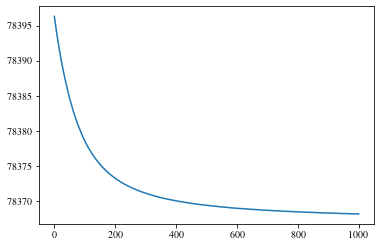

In [1147]:
plt.plot(loss_2)

In [1095]:
iterations = 20000

W1, b1, W2, b2, loss, W1_save, b1_save, W2_save, b2_save = \
                grad_descent(X_train, X_test, iterations, W1, b1, W2, b2, 0.001, 0.0001)

/var/folders/rq/q7l_wtbx4sx5ky0yrvbk7fgh0000gq/T/ipykernel_77160/773429524.py:93: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for indx, i in tqdm.tqdm_notebook(enumerate(range(iterations))):


0it [00:00, ?it/s]

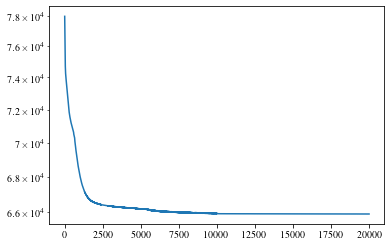

In [1097]:
plt.plot(loss)
plt.yscale('log')

In [1098]:
predicted = forward_prop(X_train, W1, b1, W2, b2)

In [1099]:
predicted.shape


(3, 800)

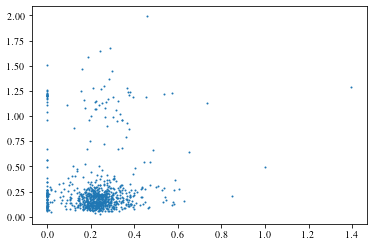

In [1105]:
plt.scatter(predicted[1], X_test[1],s=1)
# plt.xlim(0,100)
# plt.ylim(0,100)


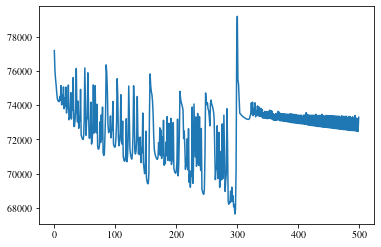

In [1076]:
plt.plot(loss)
# lr = 0.01

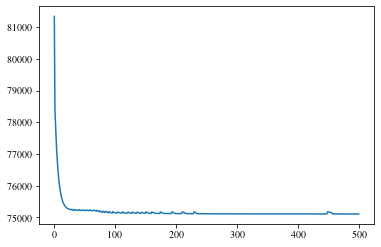

In [1080]:
plt.plot(loss)
# lr = 0.05

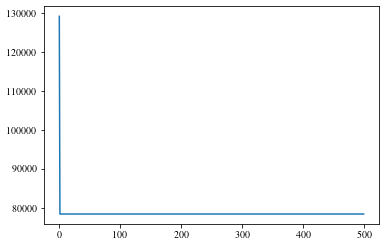

In [1083]:
plt.plot(loss)
# lr = 0.1

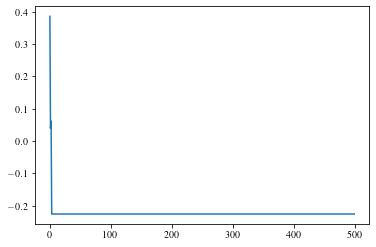

In [1041]:
plt.plot(W1_save[:,0,1])

In [1000]:
iterations = 1000

W1, b1, W2, b2, loss = grad_descent(X_train, X_test, iterations)

Loss from initialised parameters: 77985.87


/var/folders/rq/q7l_wtbx4sx5ky0yrvbk7fgh0000gq/T/ipykernel_77160/210197031.py:98: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(iterations)):


  0%|          | 0/1000 [00:00<?, ?it/s]

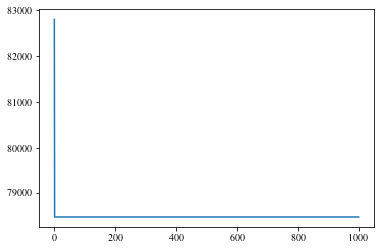

In [1001]:
plt.plot(loss)